In [1]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
# # modelling libraries
# from sklearn import preprocessing
# plt.rc("font", size=14)
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# import seaborn as sns
# # sns.set(style="white")
# # sns.set(style="whitegrid", color_codes=True)

In [3]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')
# This was a marning on the KDE plot for 2D topo mappings

In [5]:
# Read in dataset
data = pd.read_csv('transfusion.csv')

data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB



    Recency - months since the last donation)
    Frequency - total number of donation)
    Monetary - total blood donated in c.c.)
    Time - months since the first donation)
    a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)


In [7]:
# Rename target column as 'target' 
data.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)


data.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [8]:
data.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
target                   int64
dtype: object

In [9]:
# %%time
# # Line plot of points/reviews
# data['Recency (months)'].value_counts().sort_index().plot.line()

### Exploring the data : 1 stands for donating blood; 0 stands for not donating blood

In [10]:
data['target'].value_counts()

0    570
1    178
Name: target, dtype: int64

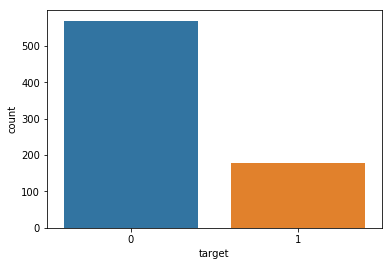

In [11]:
sns.countplot(x='target', data=data)
plt.show()

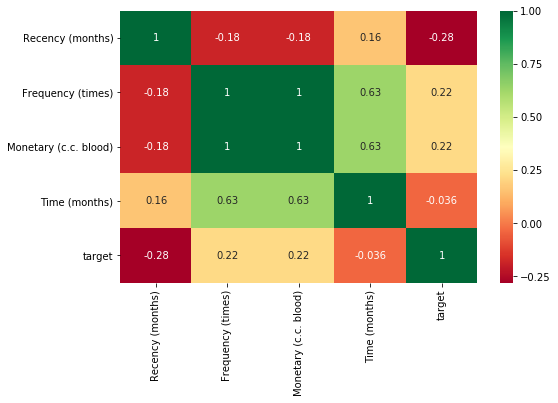

In [12]:
# col = ["Recency (months)", "Frequency (times)", "Monetary (c.c. blood)", "Time (months)"]
# X = [col]

plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Calculate Percentage of Donors and Non donors

In [25]:
count_non_don = len(data[data['target']==0])
count_don = len(data[data['target']==1])

x = round((count_non_don/(count_non_don + count_don)*100),2)
print(f"percentage of non donors ===== {x}%")

y = round((count_don/(count_non_don + count_don)*100),2)
print(f"\npercentage of donors ======== {y}%")

percentage of non donors ===== 76.2%

percentage of donors ======== 23.8%


### Classification

In [14]:
#data[['Recency (months)', 'Time (months)', 'target']].tail()
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [15]:
# Declaring Input Variables and Target Variable
X = data.iloc[:, [0,1,3]].values
Y = data.iloc[:, 4].values


In [16]:
X

array([[ 2, 50, 98],
       [ 0, 13, 28],
       [ 1, 16, 35],
       ...,
       [23,  3, 62],
       [39,  1, 39],
       [72,  1, 72]], dtype=int64)

In [17]:
#Y

In [18]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model

In [20]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [21]:
# Predicting Test set results to divide dependent variables into zeros and ones 
Y_pred = classifier.predict(X_test)

In [44]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))

Accuracy 0.7165775401069518


In [40]:
var_prob = classifier.predict_proba(X_test)
var_prob[0, :]

array([0.75055411, 0.24944589])

In [46]:
# Measuring Classificaton performance with Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[129,   3],
       [ 50,   5]], dtype=int64)

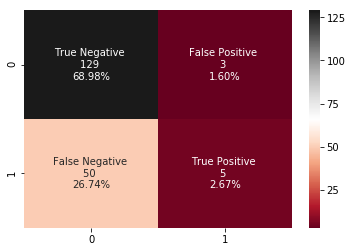

In [60]:
# Visualize Confusion Matrix

#sns.heatmap(cm, annot=True)
labels_names = ['True Negative','False Positive','False Negative','True Positive']

labels_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
labels_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1} \n{v2} \n{v3}' for v1, v2, v3 in
          zip(labels_names,labels_counts,labels_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdGy')

129 == Obsereved Zeros
5   == Observed Ones
3   == Number of False Positves
50  == Number of False Negatives

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       132
           1       0.62      0.09      0.16        55

    accuracy                           0.72       187
   macro avg       0.67      0.53      0.49       187
weighted avg       0.69      0.72      0.63       187



In [64]:
# Save Model
import pickle

filename = 'firstmodel.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [67]:
# load the model

# model = pickle.load(open(filename, 'rb'))
# result = model.score(X_test, Y_test)
# result

Conclusion

Blood donation is a difficult task and sometimes hard to get people to donate.

This analysis helped to see the number of people who donate blood frequently in a certain month. 
A model was built with a Logistic Regression Classifier with Accuracy score of 0.7165. 
A confusion matrix was then used measure the performance of the test and train data.

